In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/mredshaw/Toronto_Shooting_Incidents_Prediction/main/data/Group%20Project%20Data-SFD%20Data-Toronto%20Police.csv')

In [39]:
df

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [40]:
df.set_index('EVENT_UNIQUE_ID', inplace=True)

In [41]:
df

,X,Y,OBJECTID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
EVENT_UNIQUE_ID,,,,,,,,,,,,,,,,,,,,
GO-2004397105,-79.234955,43.781528,1,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
GO-2004600109,-79.618218,43.733547,2,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
GO-2004311851,-79.518759,43.769157,3,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
GO-2004736004,-79.378870,43.660665,4,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
GO-2004303455,-79.212435,43.812075,5,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO-20221038418,-79.362941,43.771764,5703,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
GO-20221362949,-79.402702,43.643920,5704,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
GO-2022336423,-79.196217,43.786621,5705,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621


In [42]:
df.sort_index(axis=0, ascending=True) 

,X,Y,OBJECTID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
EVENT_UNIQUE_ID,,,,,,,,,,,,,,,,,,,,
GO-20041036512,-79.235253,43.739524,95,2004/10/15 04:00:00+00,2004,October,Friday,289,15,5,Night,D43,0,0,138,Eglinton East,138,Eglinton East (138),-79.235253,43.739524
GO-20041053840,-79.494743,43.673984,158,2004/06/03 04:00:00+00,2004,June,Thursday,155,3,20,Evening,D12,0,0,111,Rockcliffe-Smythe,111,Rockcliffe-Smythe (111),-79.494743,43.673984
GO-2004120070,-85.488744,0.000000,79,2004/01/03 05:00:00+00,2004,January,Saturday,3,3,1,Night,D54,0,0,NSA,NSA,NSA,NSA,-85.488744,0.000000
GO-2004125755,-79.233887,43.781741,32,2004/01/08 05:00:00+00,2004,January,Thursday,8,8,8,Morning,D42,1,0,142,Woburn North,137,Woburn (137),-79.233887,43.781741
GO-2004126451,-79.256025,43.732873,87,2004/01/05 05:00:00+00,2004,January,Monday,5,5,13,Afternoon,D41,0,1,124,Kennedy Park,124,Kennedy Park (124),-79.256025,43.732873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO-2022976987,-79.545348,43.721709,5630,2022/05/24 04:00:00+00,2022,May,Tuesday,144,24,17,Afternoon,D23,0,0,5,Elms-Old Rexdale,5,Elms-Old Rexdale (5),-79.545348,43.721709
GO-2022978548,-79.197577,43.758964,5354,2022/05/24 04:00:00+00,2022,May,Tuesday,144,24,21,Evening,D43,0,1,136,West Hill,136,West Hill (136),-79.197577,43.758964
GO-202298250,-79.458334,43.670092,5345,2022/01/16 05:00:00+00,2022,January,Sunday,16,16,2,Night,D11,0,0,91,Weston-Pelham Park,91,Weston-Pellam Park (91),-79.458334,43.670092


In [43]:
df.set_index('OBJECTID', inplace=True)

In [44]:
df

,X,Y,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
OBJECTID,,,,,,,,,,,,,,,,,,,
1,-79.234955,43.781528,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
2,-79.618218,43.733547,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
3,-79.518759,43.769157,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
4,-79.378870,43.660665,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
5,-79.212435,43.812075,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,-79.362941,43.771764,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5704,-79.402702,43.643920,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5705,-79.196217,43.786621,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621


In [45]:
df_division = df[['DIVISION', 'DEATH', 'INJURIES', 'OCC_YEAR']]

In [46]:
df_division

,DIVISION,DEATH,INJURIES,OCC_YEAR
OBJECTID,,,,
1,D41,0,0,2004
2,D23,0,0,2004
3,D31,1,1,2004
4,D51,1,0,2004
5,D42,0,0,2004
...,...,...,...,...
5703,D33,0,1,2022
5704,D14,1,1,2022
5705,D43,0,0,2022


In [47]:
df_division.sort_values('DIVISION', ascending=True)

,DIVISION,DEATH,INJURIES,OCC_YEAR
OBJECTID,,,,
4138,D11,0,0,2019
1116,D11,0,1,2009
3641,D11,0,1,2018
4474,D11,1,0,2020
2808,D11,0,1,2016
...,...,...,...,...
4376,D55,0,0,2019
1802,D55,0,1,2011
951,D55,0,1,2008


In [48]:
df_division_grouped = df_division.groupby(["DIVISION","OCC_YEAR"]).agg("sum")


In [49]:
df_division_grouped

DEATH  INJURIES
DIVISION OCC_YEAR                 
D11      2004          0         0
         2005          2         1
         2006          0         3
         2007          1         0
         2008          0         0
...                  ...       ...
D55      2018          0         2
         2019          0         6
         2020          0         3
         2021          1         3
         2022          2         4

[323 rows x 2 columns]

In [50]:
df_division_grouped['TOTAL_INCIDENTS'] = df_division_grouped['DEATH'] + df_division_grouped['INJURIES']

In [51]:
df_division_grouped

DEATH  INJURIES  TOTAL_INCIDENTS
DIVISION OCC_YEAR                                  
D11      2004          0         0                0
         2005          2         1                3
         2006          0         3                3
         2007          1         0                1
         2008          0         0                0
...                  ...       ...              ...
D55      2018          0         2                2
         2019          0         6                6
         2020          0         3                3
         2021          1         3                4
         2022          2         4                6

[323 rows x 3 columns]

In [52]:
df_division_yr = df_division.groupby(["OCC_YEAR"])

In [53]:
df_division_yr

In [54]:
df_division_grouped['TOTAL_INCIDENTS'] = df_division_grouped['TOTAL_INCIDENTS'].apply(pd.Series)

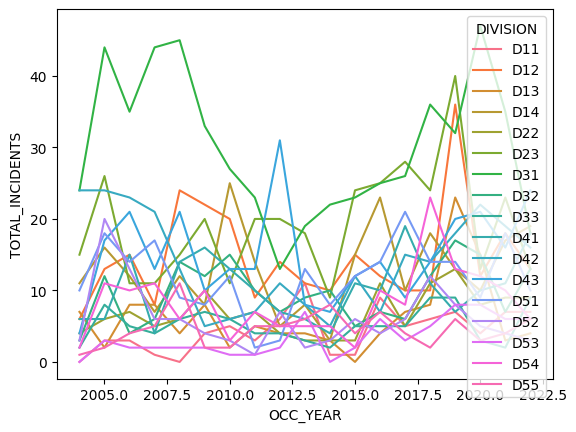

In [55]:
sns.lineplot(data=df_division_grouped, x='OCC_YEAR', y='TOTAL_INCIDENTS', hue='DIVISION')
plt.show()

In [56]:
df_division_grouped

DEATH  INJURIES  TOTAL_INCIDENTS
DIVISION OCC_YEAR                                  
D11      2004          0         0                0
         2005          2         1                3
         2006          0         3                3
         2007          1         0                1
         2008          0         0                0
...                  ...       ...              ...
D55      2018          0         2                2
         2019          0         6                6
         2020          0         3                3
         2021          1         3                4
         2022          2         4                6

[323 rows x 3 columns]

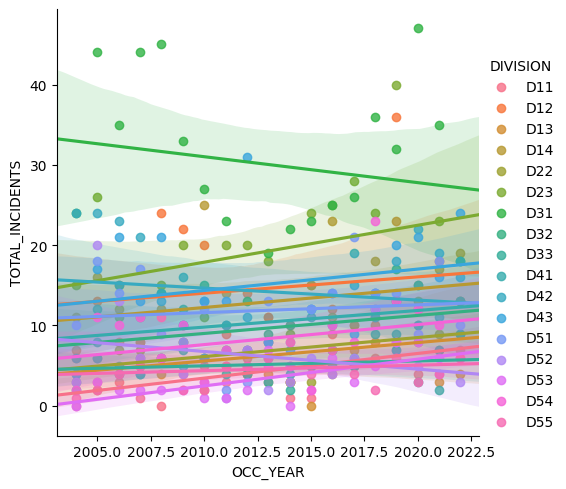

In [57]:
df_division_grouped_new = df_division_grouped.reset_index()

sns.lmplot(data=df_division_grouped_new, x='OCC_YEAR', y='TOTAL_INCIDENTS', hue='DIVISION', truncate=False)
plt.show()

In [58]:
df_division_grouped_new

,DIVISION,OCC_YEAR,DEATH,INJURIES,TOTAL_INCIDENTS
0,D11,2004,0,0,0
1,D11,2005,2,1,3
2,D11,2006,0,3,3
3,D11,2007,1,0,1
4,D11,2008,0,0,0
...,...,...,...,...,...
318,D55,2018,0,2,2
319,D55,2019,0,6,6
320,D55,2020,0,3,3
321,D55,2021,1,3,4


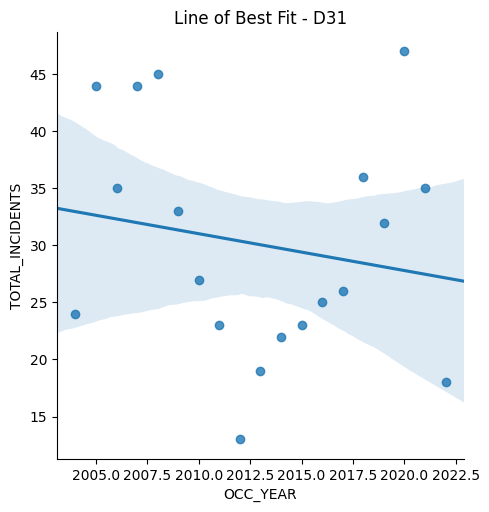

In [59]:
division_name = 'D31'
division_data = df_division_grouped_new[df_division_grouped_new['DIVISION'] == division_name]

sns.lmplot(data=division_data, x='OCC_YEAR', y='TOTAL_INCIDENTS', truncate=False)
plt.title(f"Line of Best Fit - {division_name}")
plt.show()

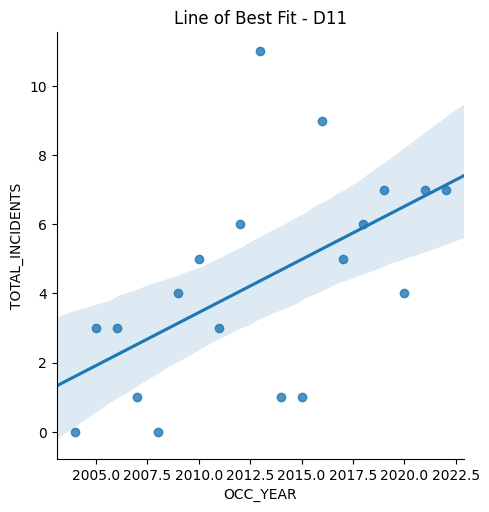

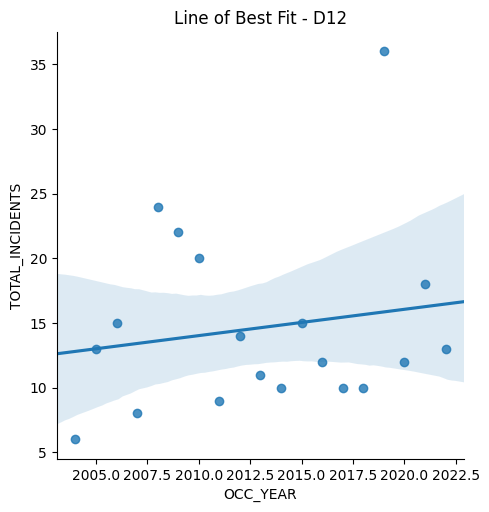

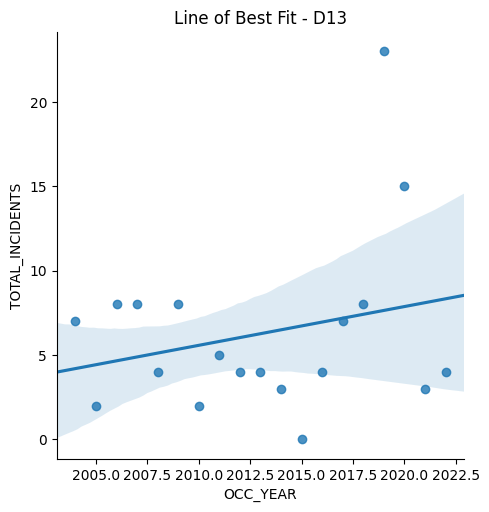

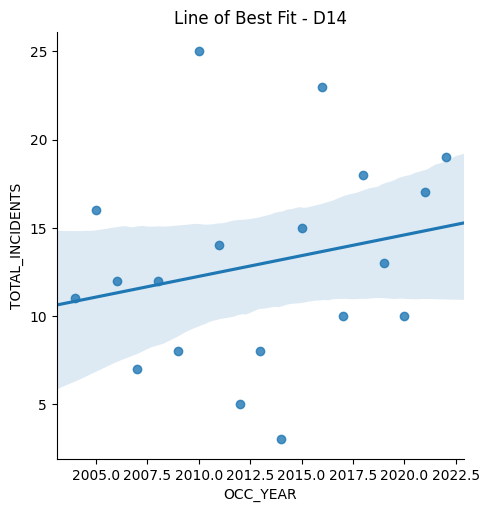

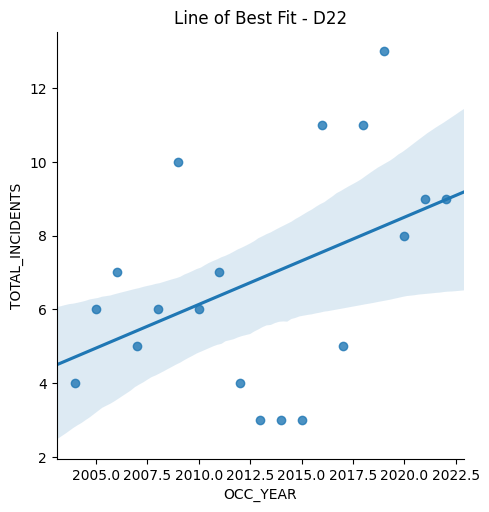

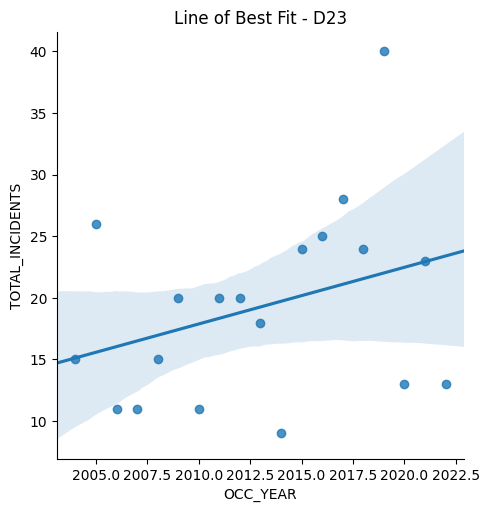

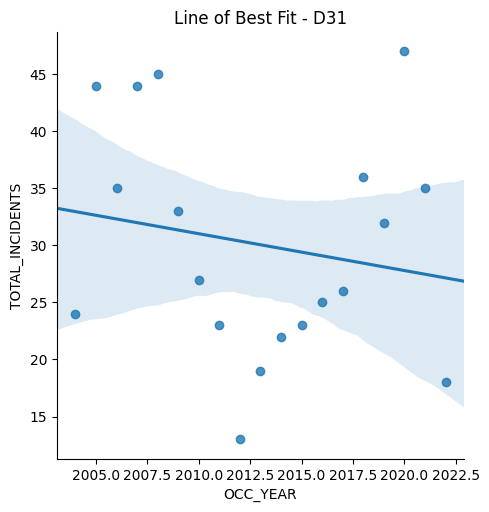

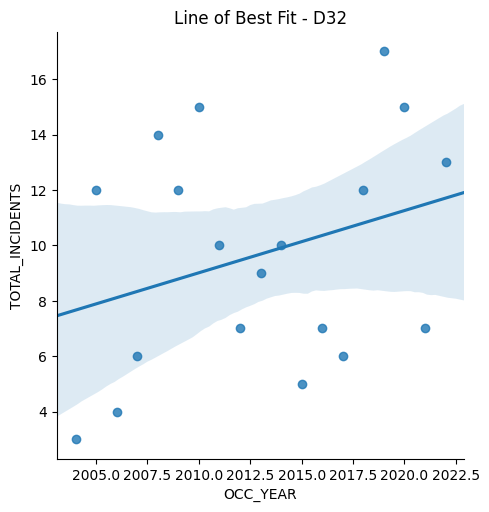

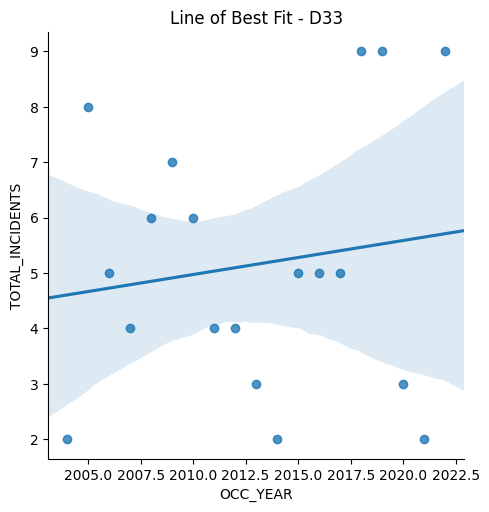

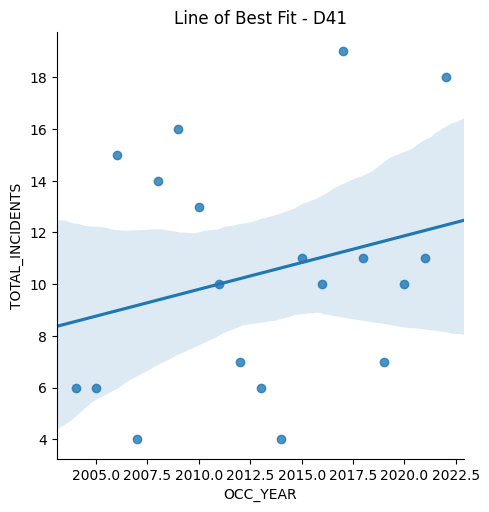

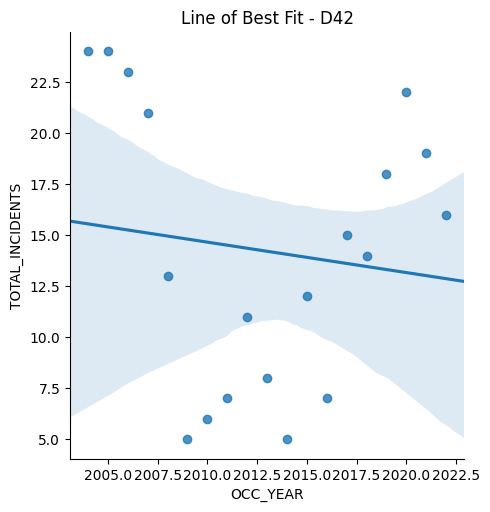

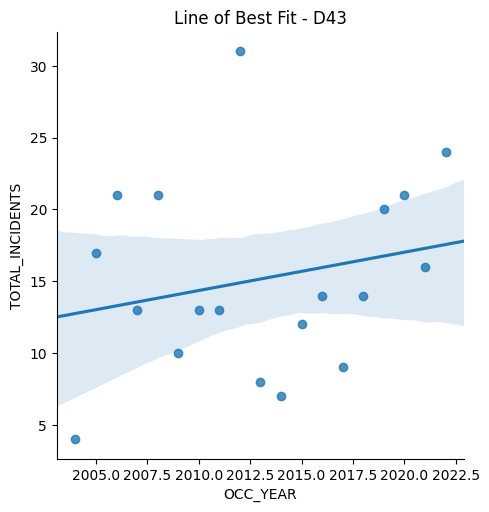

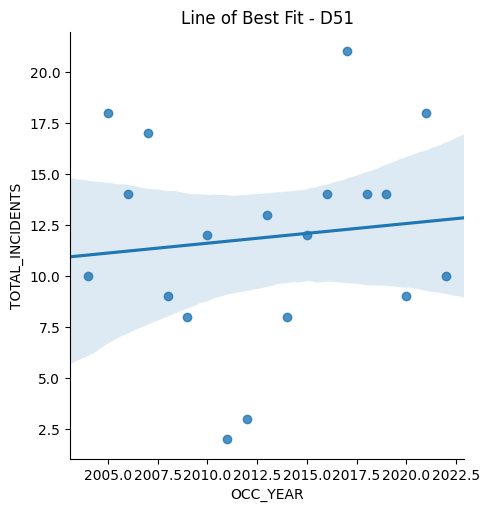

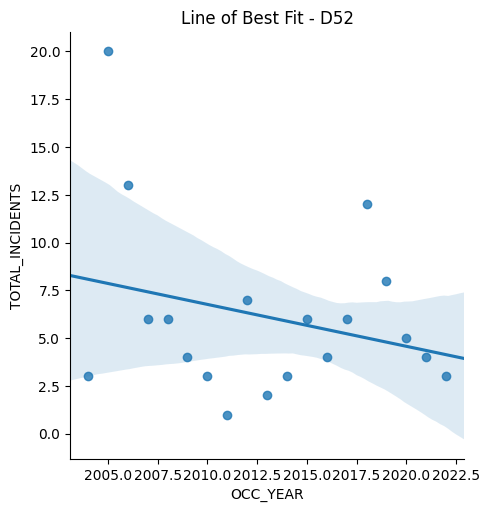

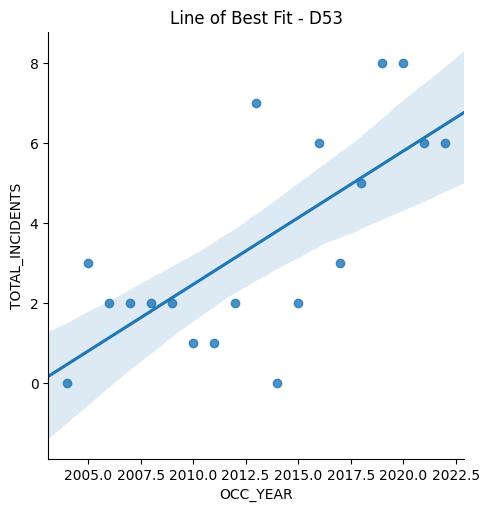

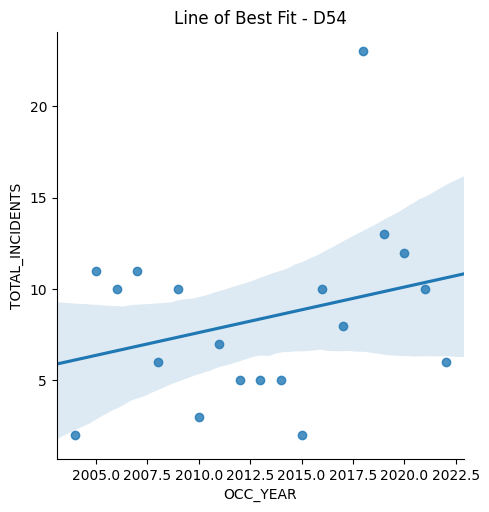

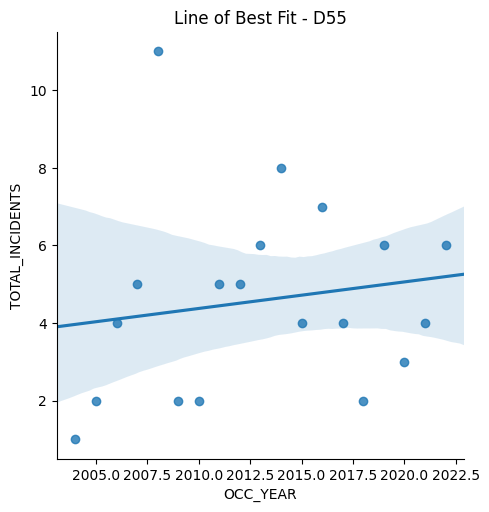

In [60]:
for division_name in df_division_grouped_new['DIVISION'].unique():
    division_data = df_division_grouped_new[df_division_grouped_new['DIVISION'] == division_name]

    sns.lmplot(data=division_data, x='OCC_YEAR', y='TOTAL_INCIDENTS', truncate=False)
    plt.title(f"Line of Best Fit - {division_name}")
    plt.show()



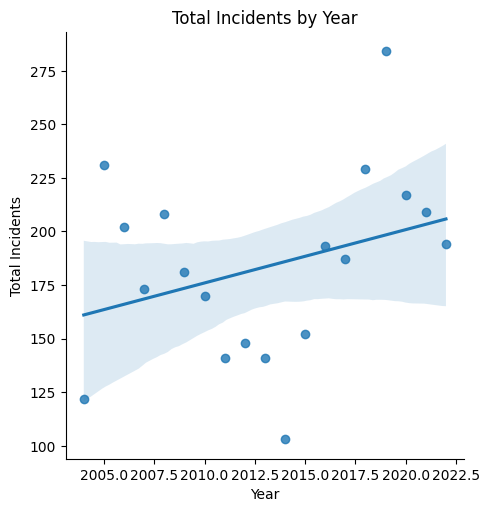

In [61]:
df_yearly_total = df_division_grouped_new.groupby('OCC_YEAR')['TOTAL_INCIDENTS'].sum().reset_index()

sns.lmplot(data=df_yearly_total, x='OCC_YEAR', y='TOTAL_INCIDENTS')
plt.title('Total Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

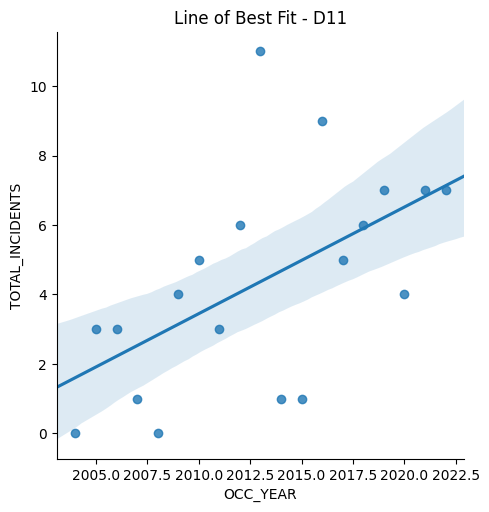

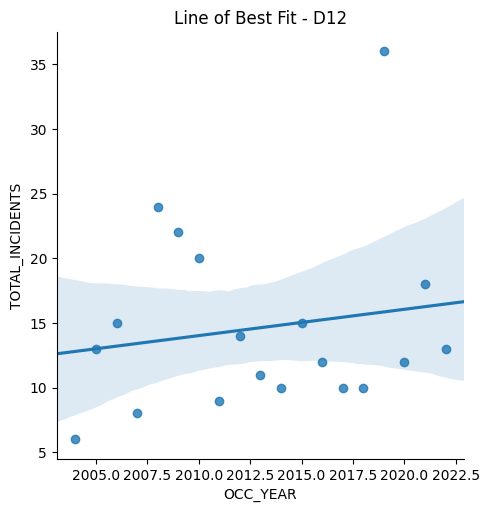

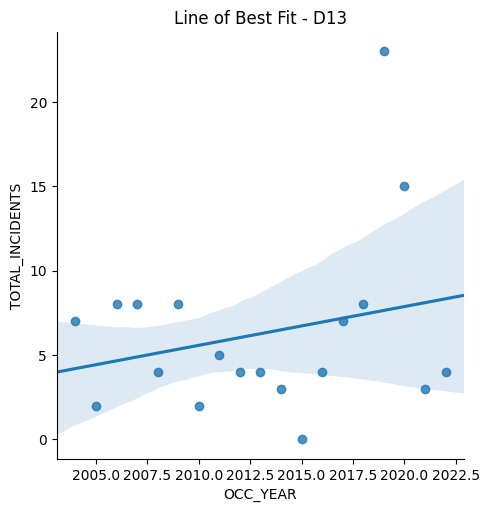

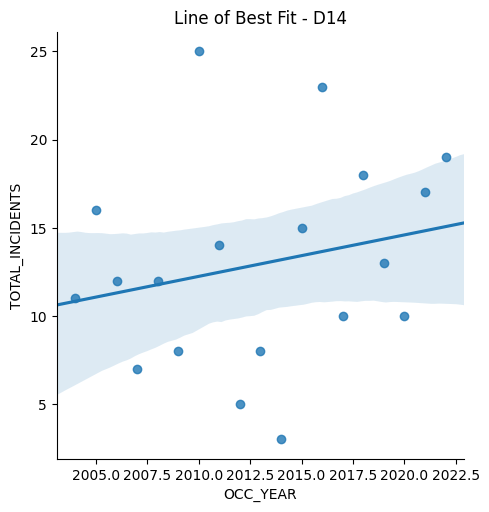

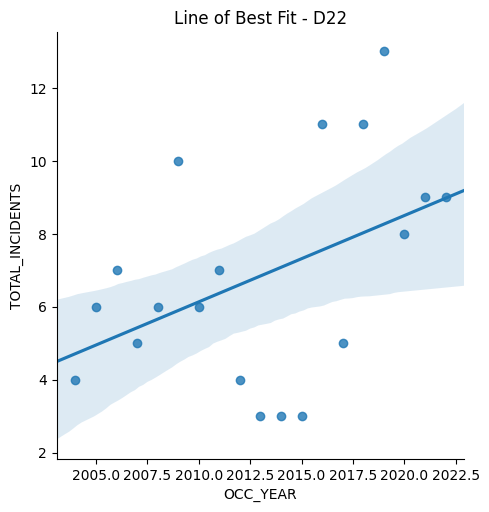

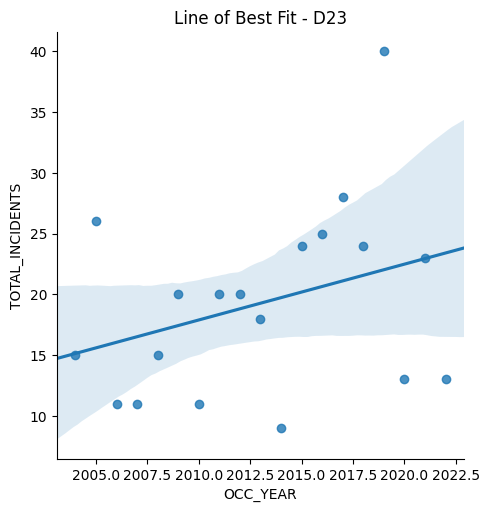

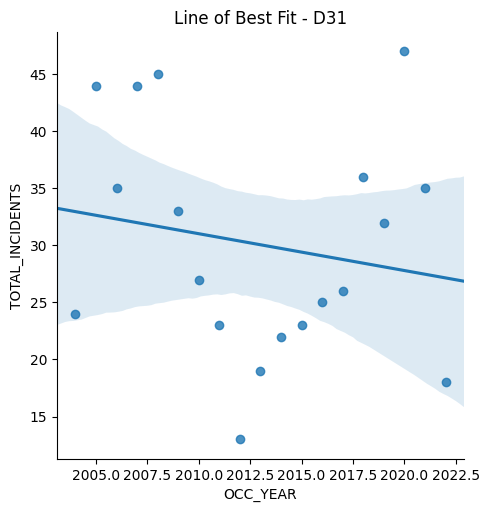

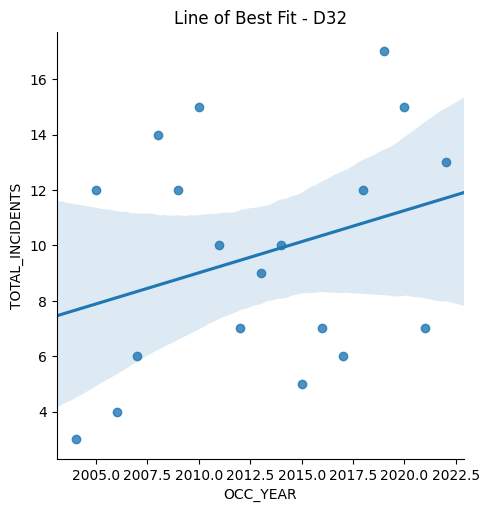

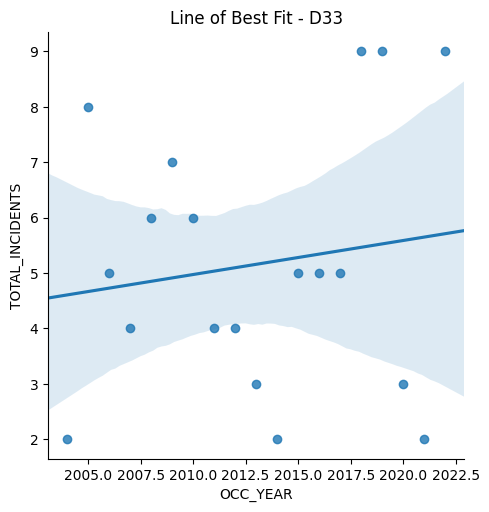

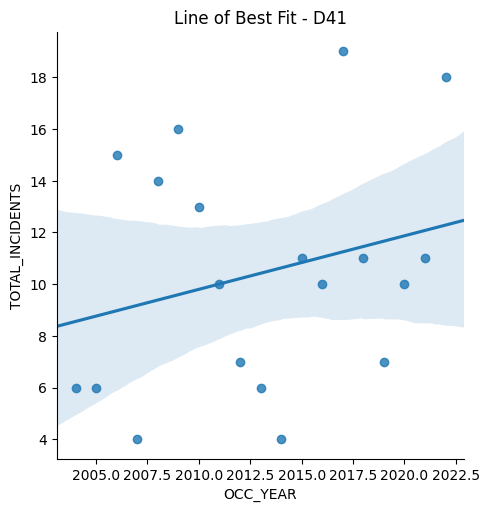

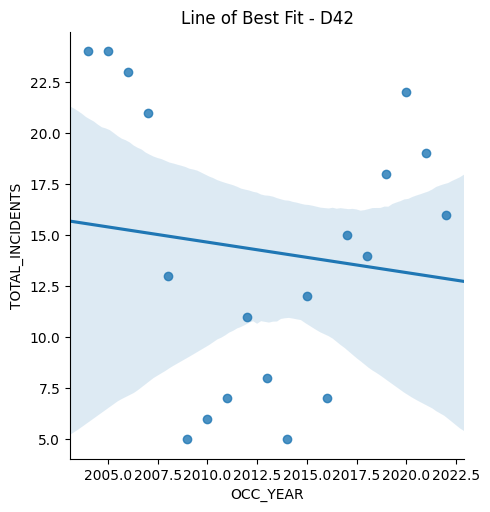

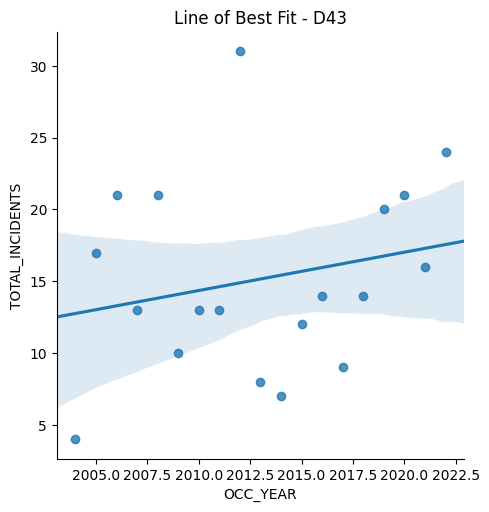

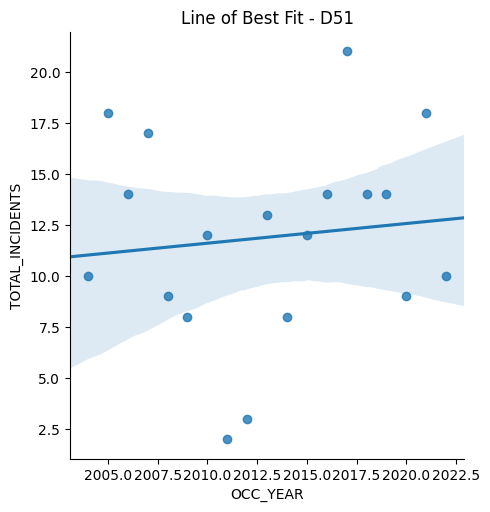

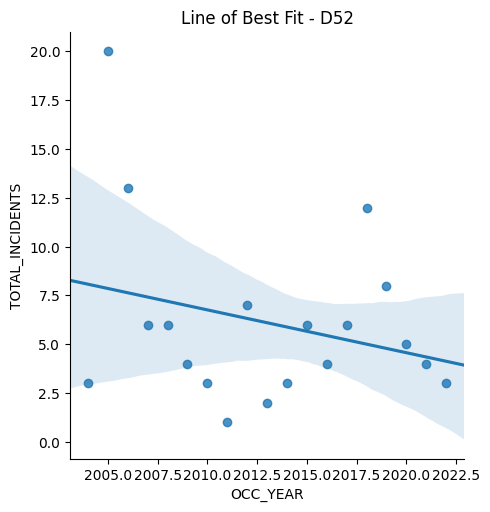

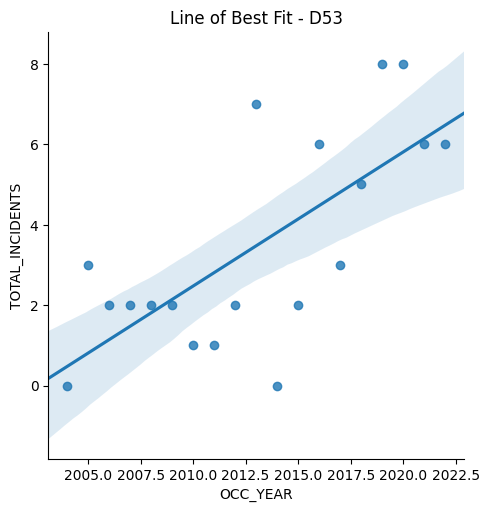

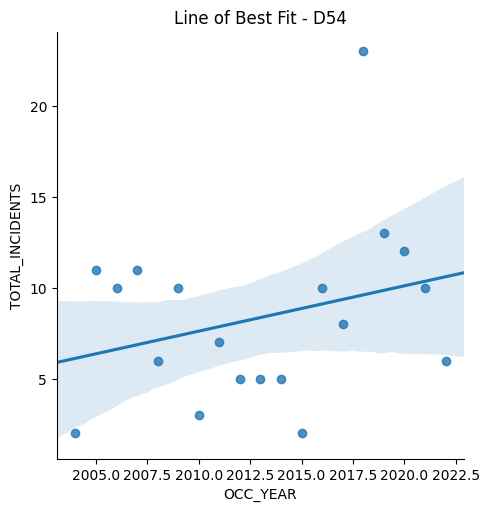

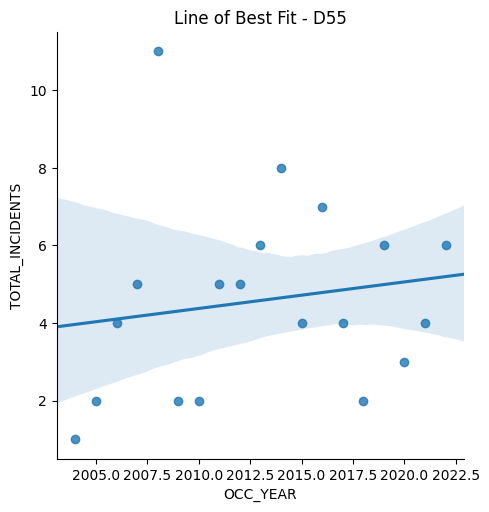

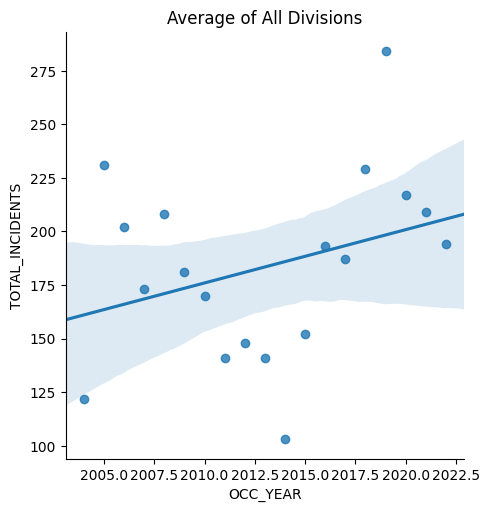

In [62]:
df_yearly_total = df_division_grouped_new.groupby('OCC_YEAR')['TOTAL_INCIDENTS'].sum().reset_index()

# Iterate over each division
for division_name in df_division_grouped_new['DIVISION'].unique():
    division_data = df_division_grouped_new[df_division_grouped_new['DIVISION'] == division_name]

    # Plot the lmplot for each division
    sns.lmplot(data=division_data, x='OCC_YEAR', y='TOTAL_INCIDENTS', truncate=False)
    plt.title(f"Line of Best Fit - {division_name}")
    plt.show()

# Plot the lmplot for the average of all divisions
sns.lmplot(data=df_yearly_total, x='OCC_YEAR', y='TOTAL_INCIDENTS', truncate=False)
plt.title('Average of All Divisions')
plt.show()

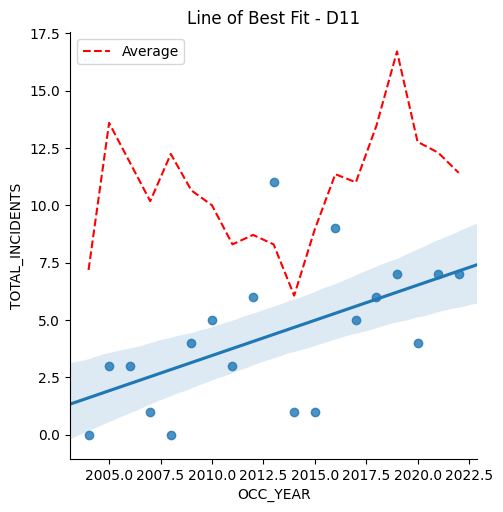

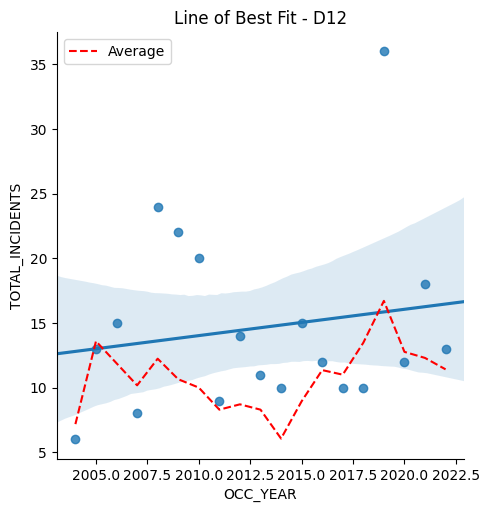

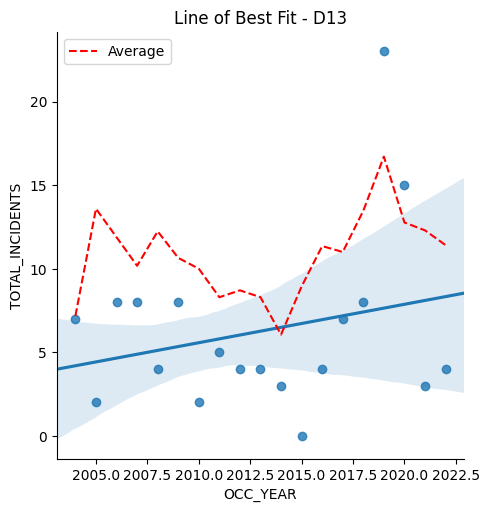

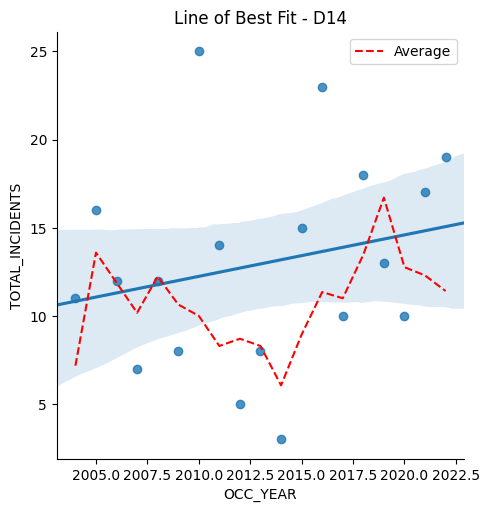

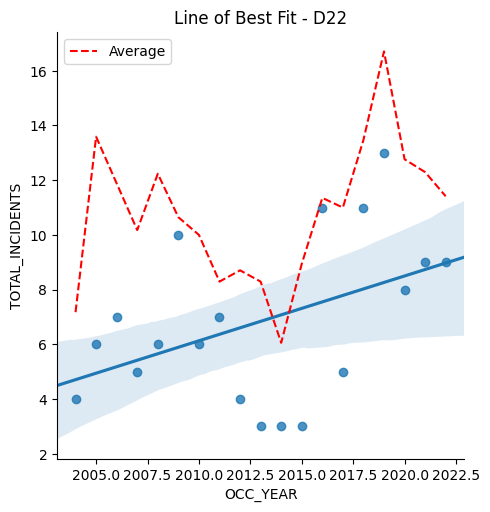

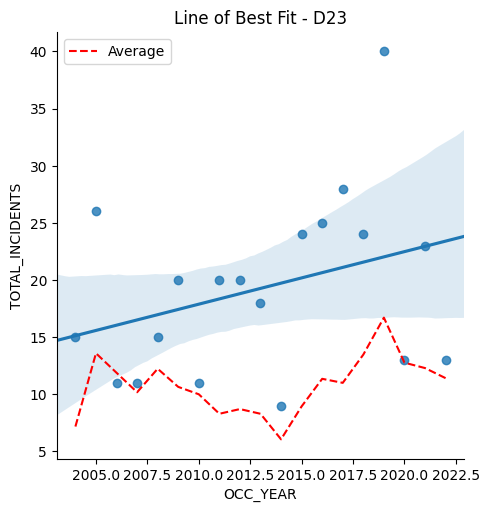

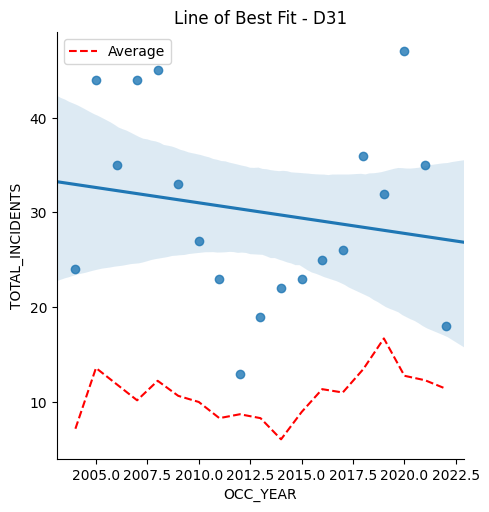

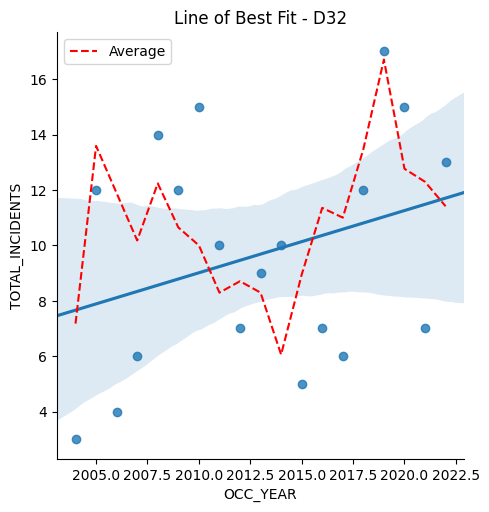

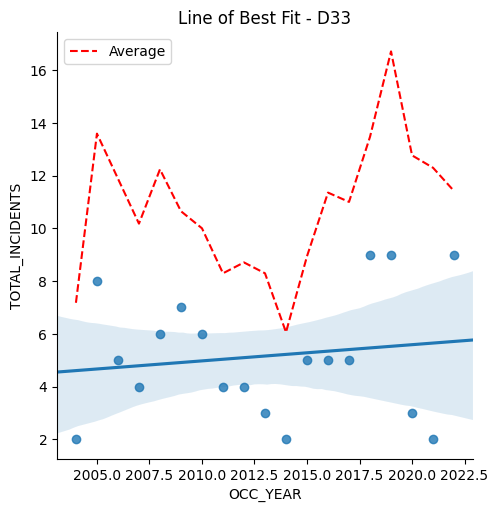

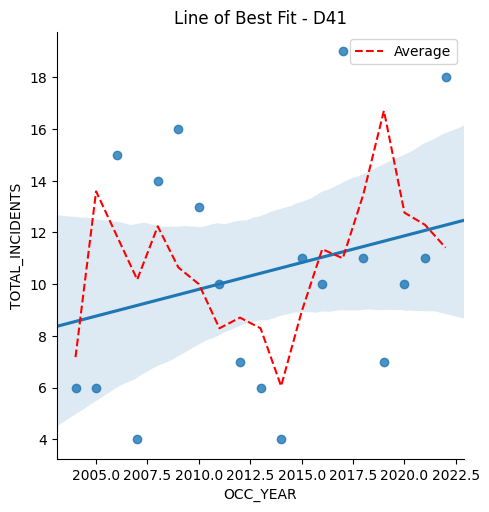

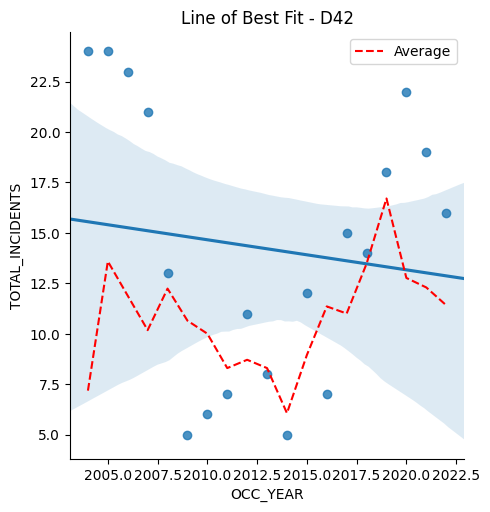

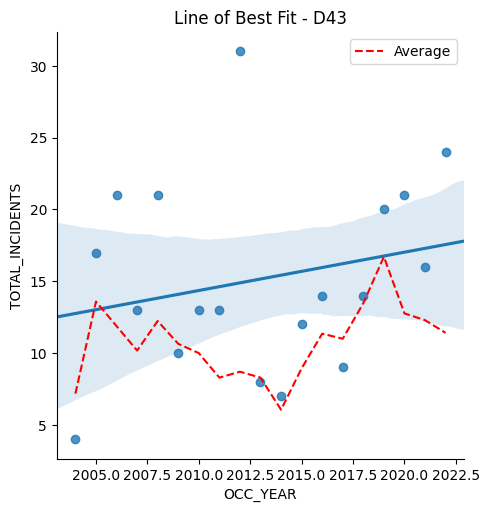

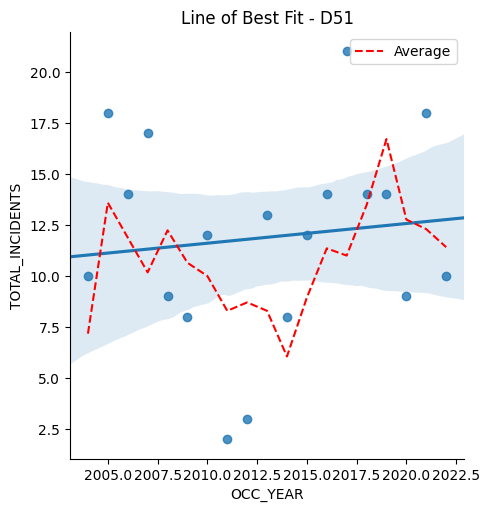

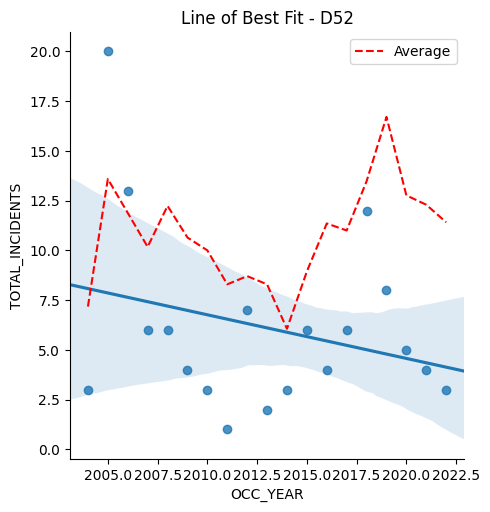

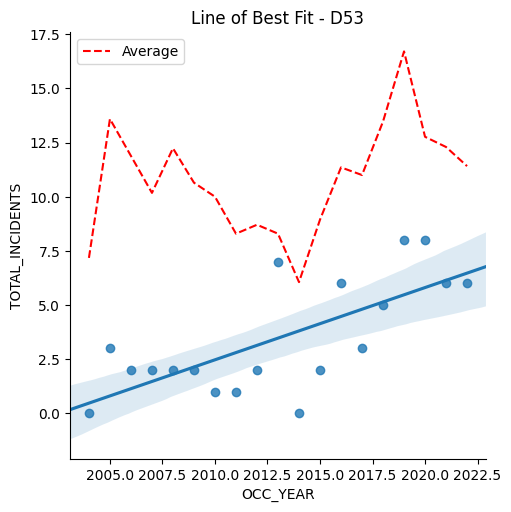

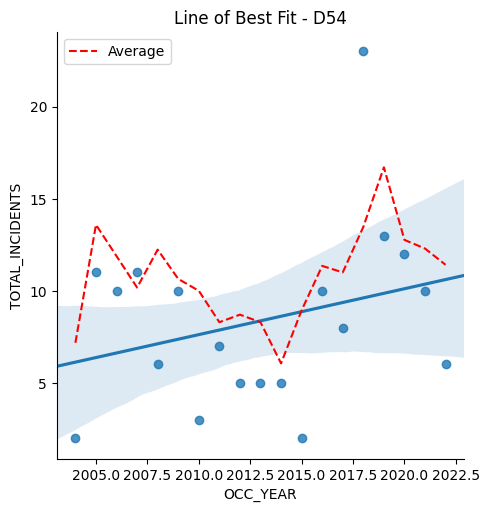

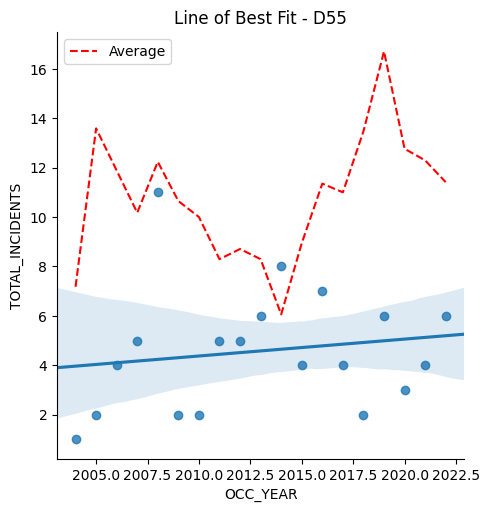

In [63]:
df_yearly_avg = df_division_grouped_new.groupby(['OCC_YEAR', 'DIVISION'])['TOTAL_INCIDENTS'].mean().reset_index()

# Iterate over each division
for division_name in df_division_grouped_new['DIVISION'].unique():
    division_data = df_yearly_avg[df_yearly_avg['DIVISION'] == division_name]

    # Plot the lmplot for each division
    lmplot = sns.lmplot(data=division_data, x='OCC_YEAR', y='TOTAL_INCIDENTS', truncate=False)
    plt.title(f"Line of Best Fit - {division_name}")

    # Add the average line to the lmplot
    avg_line = df_yearly_avg.groupby('OCC_YEAR')['TOTAL_INCIDENTS'].mean().reset_index()
    plt.plot(avg_line['OCC_YEAR'], avg_line['TOTAL_INCIDENTS'], color='red', linestyle='--', label='Average')
    
    # Show legend
    plt.legend()
    
    plt.show()

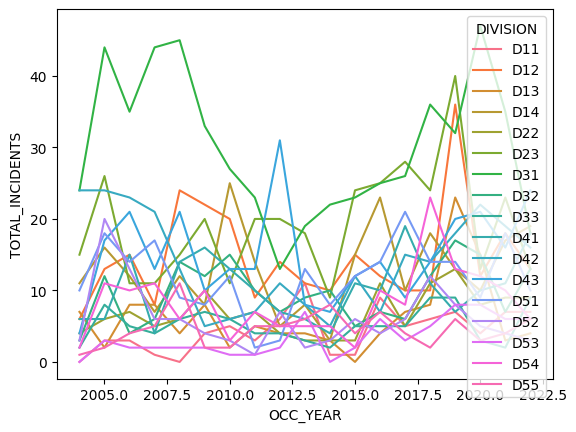

In [64]:
sns.lineplot(data=df_division_grouped, x='OCC_YEAR', y='TOTAL_INCIDENTS', hue='DIVISION')
plt.show()

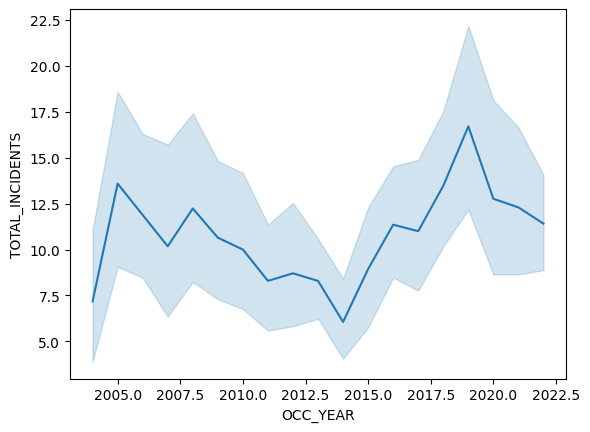

In [65]:
sns.lineplot(data=df_division_grouped, x='OCC_YEAR', y='TOTAL_INCIDENTS')
plt.show()